In [44]:
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats import binom
%matplotlib inline
sns.set(color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from scipy.stats import chi2_contingency, ttest_ind
from pandas.plotting import scatter_matrix


In [45]:
df = pd.read_csv("DF1_EDA.csv")

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   float64
 1   Attrition                 1470 non-null   object 
 2   BusinessTravel            1470 non-null   object 
 3   Department                1470 non-null   object 
 4   DistanceFromHome          1470 non-null   float64
 5   Education                 1470 non-null   float64
 6   EducationField            1470 non-null   object 
 7   EnvironmentSatisfaction   1470 non-null   float64
 8   Gender                    1470 non-null   object 
 9   JobInvolvement            1470 non-null   float64
 10  JobLevel                  1470 non-null   float64
 11  JobRole                   1470 non-null   object 
 12  JobSatisfaction           1470 non-null   float64
 13  MaritalStatus             1470 non-null   object 
 14  MonthlyI

# Probability assessment- factors influencing attrition


#Descriptive Statistics
#Talk about boxplots and central tendencies of the data- from EDA section and Class 2 of Stats


# Relative Frequency

In [47]:
# Calculate the value counts of 'Attrition' in 'df2'
attrition_counts = df2['Attrition'].value_counts()

# Calculate the relative frequencies
relative_frequencies = attrition_counts / len(df2)

# Create a subtable
subtable = pd.DataFrame({
    'Attrition Status': attrition_counts.index,
    'Frequency': attrition_counts.values,
    'Relative Frequency': relative_frequencies.values
})

# Display the subtable
print(subtable)


  Attrition Status  Frequency  Relative Frequency
0               No       1212             0.82449
1              Yes        258             0.17551


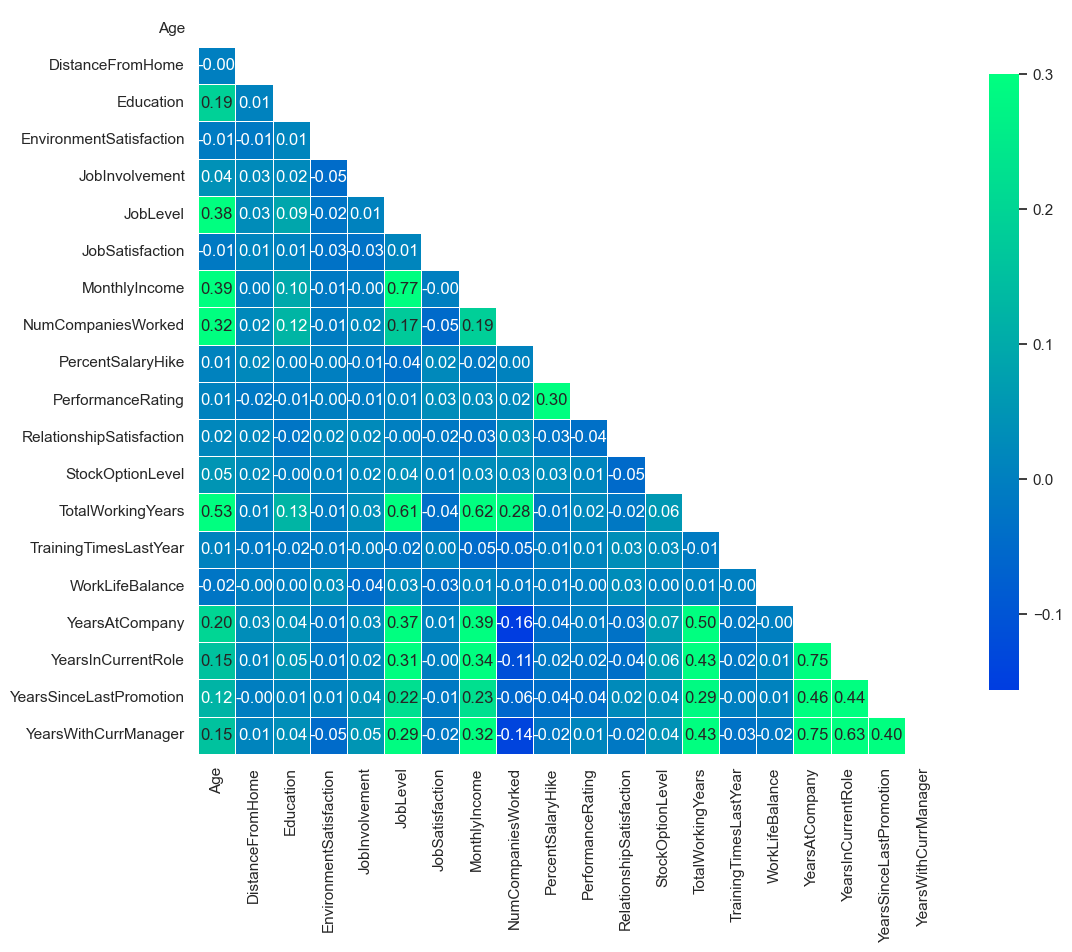

In [48]:
#EDA Multivariate Analysis
#creating a correlation matrix to visualise the connection between features

corr = df2.corr(method = "spearman")
sns.set(style="white")

mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(12, 10), dpi = 100)
sns.heatmap(corr, mask = mask, cmap= "winter", vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .8}, annot = True, fmt = ".2f")
plt.show()

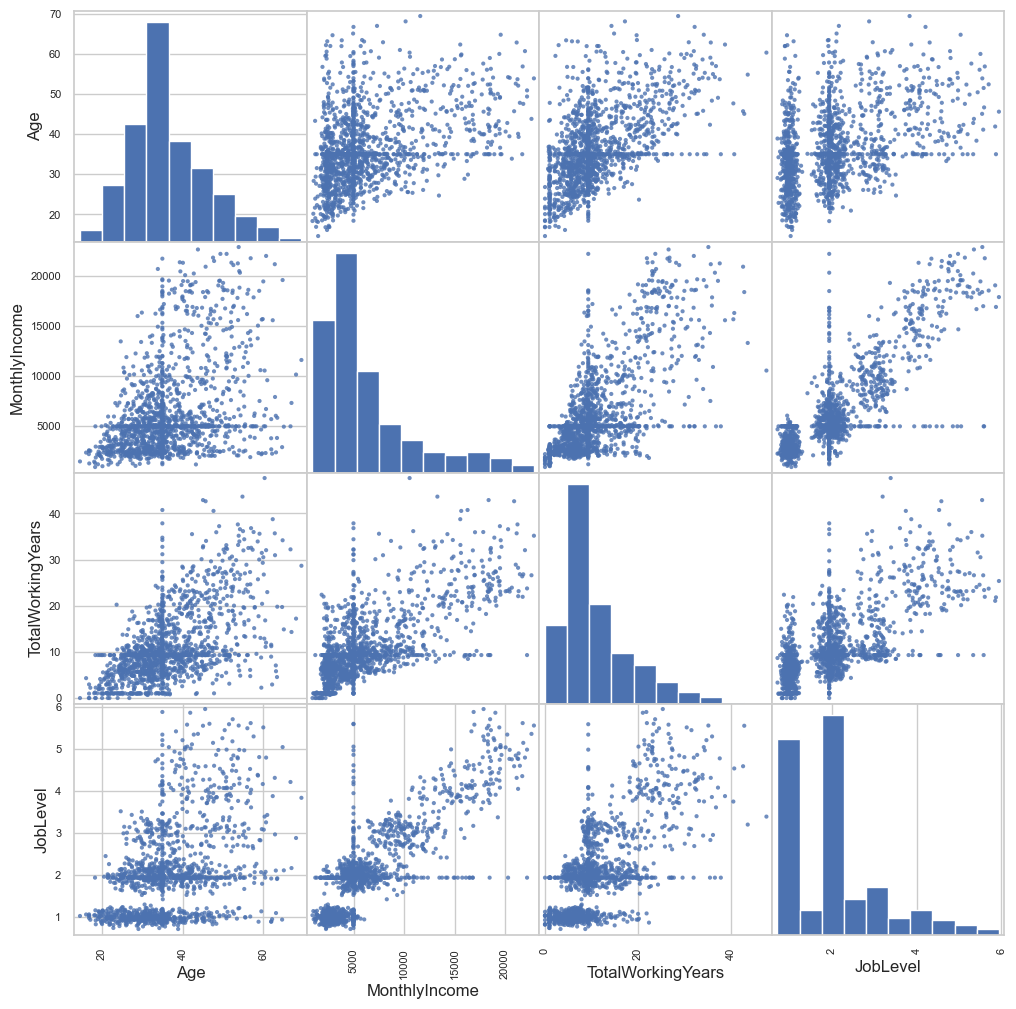

In [52]:

selected_columns = ['Age', 'MonthlyIncome', 'TotalWorkingYears', 'JobLevel']
selected_data = df2[selected_columns]

# Create a scatterplot matrix
scatter_matrix(selected_data, alpha=0.8, figsize=(12, 12), diagonal='hist')

# Show the plot
plt.show()


In [53]:
#Analyse the results above

In [58]:
#Hypothesis:
#There are strong correlations between TotalWorkingYears and MonthlyIncome, and Age/TotalWorkingYears, and Age/MonthlyIncome
#Do older workers leave at a higher rate than younger ones?

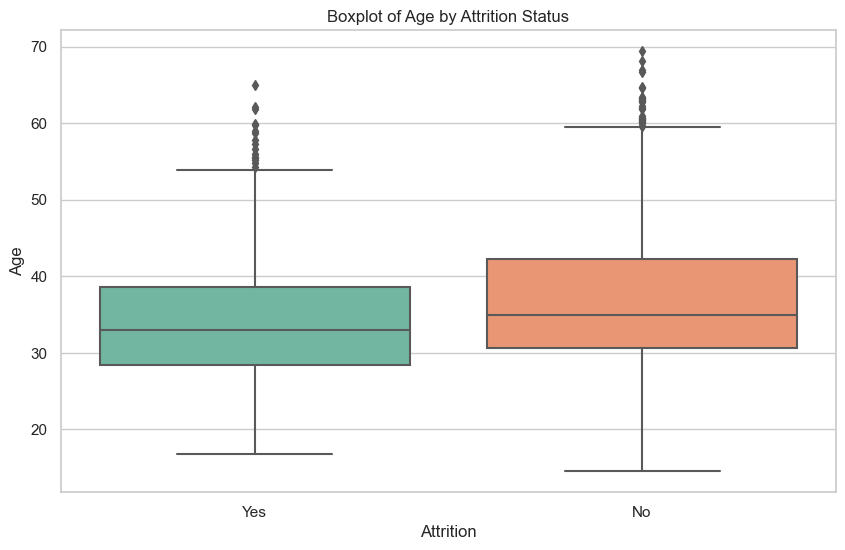

In [61]:
# Create a boxplot 
sns.set(style="whitegrid")


plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='Age', data=df2, palette='Set2')
plt.title('Boxplot of Age by Attrition Status')
plt.show()


In [65]:
# Descriptive statistics
print(df2.groupby('Attrition')['Age'].describe())

            count       mean       std        min        25%        50%  \
Attrition                                                                 
No         1212.0  36.853325  9.262683  14.544608  30.700259  34.951950   
Yes         258.0  34.651812  9.772926  16.840129  28.375773  33.057296   

                 75%        max  
Attrition                        
No         42.251654  69.402515  
Yes        38.647652  65.043722  


In [67]:
# Separate the data into two groups: Attrited and Stayed
attrited_data = df2[df2['Attrition'] == 'Yes']
stayed_data = df2[df2['Attrition'] == 'No']

# Perform an independent two-sample t-test
t_stat, p_value = ttest_ind(df2['Age'], stayed_data['Age'])

# Interpret the results
if p_value < 0.5:
    print("Reject the null hypothesis: There is a significant difference in Age.")
else:
    print("Fail to reject the null hypothesis: No significant difference in Age.")


Reject the null hypothesis: There is a significant difference in Age.


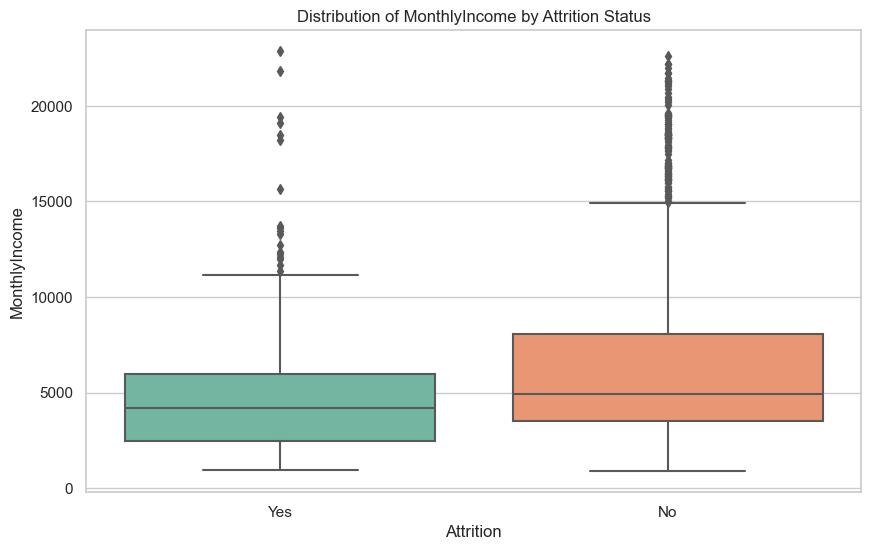

In [68]:
# Set the style for the plot
sns.set(style="whitegrid")

# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df2, palette='Set2')
plt.title('Distribution of MonthlyIncome by Attrition Status')
plt.show()


In [69]:
# Descriptive statistics
print(df2.groupby('Attrition')['MonthlyIncome'].describe())

            count         mean          std         min          25%  \
Attrition                                                              
No         1212.0  6656.372316  4658.401672  891.481007  3498.427642   
Yes         258.0  5115.614562  3734.981461  974.659192  2467.614020   

                   50%          75%           max  
Attrition                                          
No         4957.070475  8077.134563  22615.197479  
Yes        4211.200613  5971.124096  22858.020388  


In [70]:
# Separate the data into two groups: Attrited and Stayed
attrited_data = df2[df2['Attrition'] == 'Yes']
stayed_data = df2[df2['Attrition'] == 'No']

# Perform an independent two-sample t-test
t_stat, p_value = ttest_ind(df2['MonthlyIncome'], stayed_data['MonthlyIncome'])

# Interpret the results
if p_value < 0.5:
    print("Reject the null hypothesis: There is a significant difference in monthly income.")
else:
    print("Fail to reject the null hypothesis: No significant difference in monthly income.")


Reject the null hypothesis: There is a significant difference in monthly income.


In [72]:
#Overall probability of success

overall_prob_attrition = df2['Attrition'].value_counts(normalize=True)['Yes']
print(f"Overall probability of Attrition: {overall_prob_attrition:.2%}")


Overall probability of Attrition: 17.55%


In [79]:
# Calculate Z-scores for the 'Age' column
df2['Age_Zscore'] = (df2['Age'] - df2['Age'].mean()) / df2['Age'].std()

# Display the first few rows of the dataset with Z-scores
print(df2[['Age', 'Age_Zscore']].head())


         Age  Age_Zscore
0  41.920786    0.580921
1  51.589037    1.610741
2  33.131540   -0.355272
3  34.707073   -0.187453
4  24.790188   -1.243757


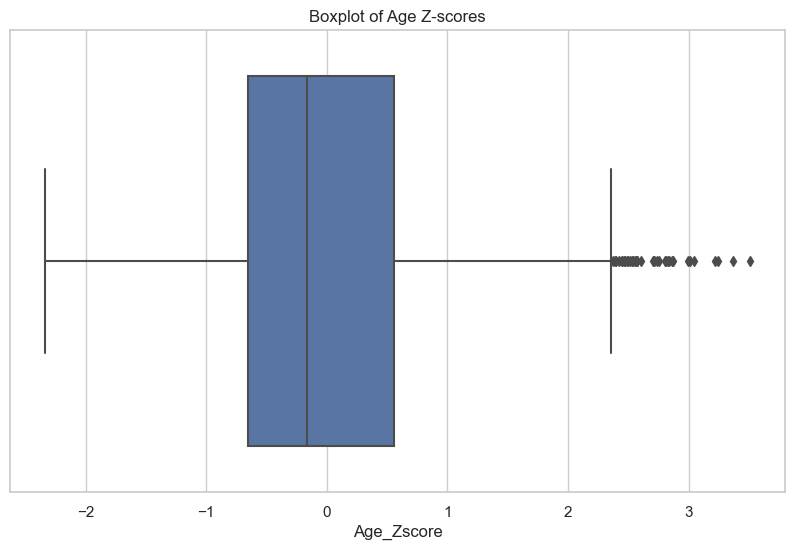

In [80]:
# Visualize Z-scores using a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age_Zscore', data=df2)
plt.title('Boxplot of Age Z-scores')
plt.show()
